<a href="https://colab.research.google.com/github/suman111999/Breast-Cancer-Classification/blob/main/classifierusingANN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import itertools
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel('BreastCancer_Prognostic_v1.xlsx')
df.head()

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


<h1>Data cleaning</h1>

In [ ]:
df.shape

(198, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
ID                           198 non-null int64
Outcome                      198 non-null object
Time                         198 non-null int64
radius_mean                  198 non-null float64
texture_mean                 198 non-null float64
perimeter_mean               198 non-null float64
area_mean                    198 non-null float64
smoothness_mean              198 non-null float64
compactness_mean             198 non-null float64
concavity_mean               198 non-null float64
concave_points_mean          198 non-null float64
symmetry_mean                198 non-null float64
fractal_dimension_mean       198 non-null float64
radius_std_dev               198 non-null float64
texture_std_dev              198 non-null float64
perimeter_std_dev            198 non-null float64
area_std_dev                 198 non-null float64
smoothness_std_dev           198 non-null float64


In [ ]:
df.replace(to_replace='?',value=np.nan,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
ID                           198 non-null int64
Outcome                      198 non-null object
Time                         198 non-null int64
radius_mean                  198 non-null float64
texture_mean                 198 non-null float64
perimeter_mean               198 non-null float64
area_mean                    198 non-null float64
smoothness_mean              198 non-null float64
compactness_mean             198 non-null float64
concavity_mean               198 non-null float64
concave_points_mean          198 non-null float64
symmetry_mean                198 non-null float64
fractal_dimension_mean       198 non-null float64
radius_std_dev               198 non-null float64
texture_std_dev              198 non-null float64
perimeter_std_dev            198 non-null float64
area_std_dev                 198 non-null float64
smoothness_std_dev           198 non-null float64


In [ ]:
df=df.fillna(df.mean())

In [ ]:
df.drop('ID',axis=1,inplace=True)

In [ ]:
df.head()

,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [ ]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 0].values


In [ ]:
#l=['Outcome','Time']
#X =df.drop(l,axis = 1 )

In [ ]:
#X.head()

In [ ]:
#X=pd.DataFrame(X)
#X.head()

In [ ]:
#y=df['Outcome']
#y.head()

In [ ]:
#y=pd.DataFrame(y)
#y.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h1>model</h1>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [ ]:
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=32))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

In [ ]:
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.fit(X_train, y_train, batch_size=100, nb_epoch=150)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
178/178 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4494
Epoch 2/150
178/178 [==============================] - 0s 37us/step - loss: 0.6924 - accuracy: 0.7584
Epoch 3/150
178/178 [==============================] - 0s 59us/step - loss: 0.6916 - accuracy: 0.7640
Epoch 4/150
178/178 [==============================] - 0s 47us/step - loss: 0.6908 - accuracy: 0.7640
Epoch 5/150
178/178 [==============================] - 0s 44us/step - loss: 0.6899 - accuracy: 0.7640
Epoch 6/150
178/178 [==============================] - 0s 45us/step - loss: 0.6890 - accuracy: 0.7640
Epoch 7/150
178/178 [==============================] - 0s 47us/step - loss: 0.6882 - accuracy: 0.7640
Epoch 8/150
178/178 [==============================] - 0s 41us/step - loss: 0.6870 - accuracy: 0.7640
Epoch 9/150
178/178 [==============================] - 0s 47us/step - loss: 0.6859 - accuracy: 0.7640
Epoch 10/150
178/178 [=============

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
tp=cm[0][0]
tn=cm[1][1]
fn=cm[1][0]
fp=cm[0][1]
print("testin score:",(tp+tn)/(tp+tn+fn+fp))

[[14  1]
 [ 5  0]]
testin score: 0.7


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82        15
           1       0.00      0.00      0.00         5

    accuracy                           0.70        20
   macro avg       0.37      0.47      0.41        20
weighted avg       0.55      0.70      0.62        20



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr,tpr,t=roc_curve(y_test,classifier.predict_proba(X_test))

In [ ]:
fpr

array([0.        , 0.06666667, 0.06666667, 0.46666667, 0.46666667,
       0.53333333, 0.53333333, 0.8       , 0.8       , 1.        ])

In [ ]:
tpr

array([0. , 0. , 0.4, 0.4, 0.6, 0.6, 0.8, 0.8, 1. , 1. ])

In [ ]:
t

array([1.5205898 , 0.5205899 , 0.33573014, 0.20872712, 0.19553614,
       0.18076053, 0.16540971, 0.09650639, 0.05533019, 0.00696334],
      dtype=float32)

In [ ]:
rc=roc_auc_score(y_test,classifier.predict(X_test))

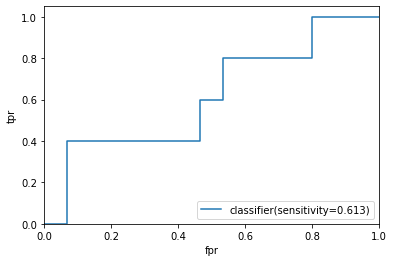

In [ ]:
plt.figure()
plt.plot(fpr,tpr,label='classifier(sensitivity=%0.3f)'%rc)
#plt.plot(([0,1],[0,1],'r--'))
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

<h1>feature selection</h1>

In [ ]:
l=['Outcome','Time']
X =df.drop(l,axis = 1 )

In [ ]:
y=df['Outcome']

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

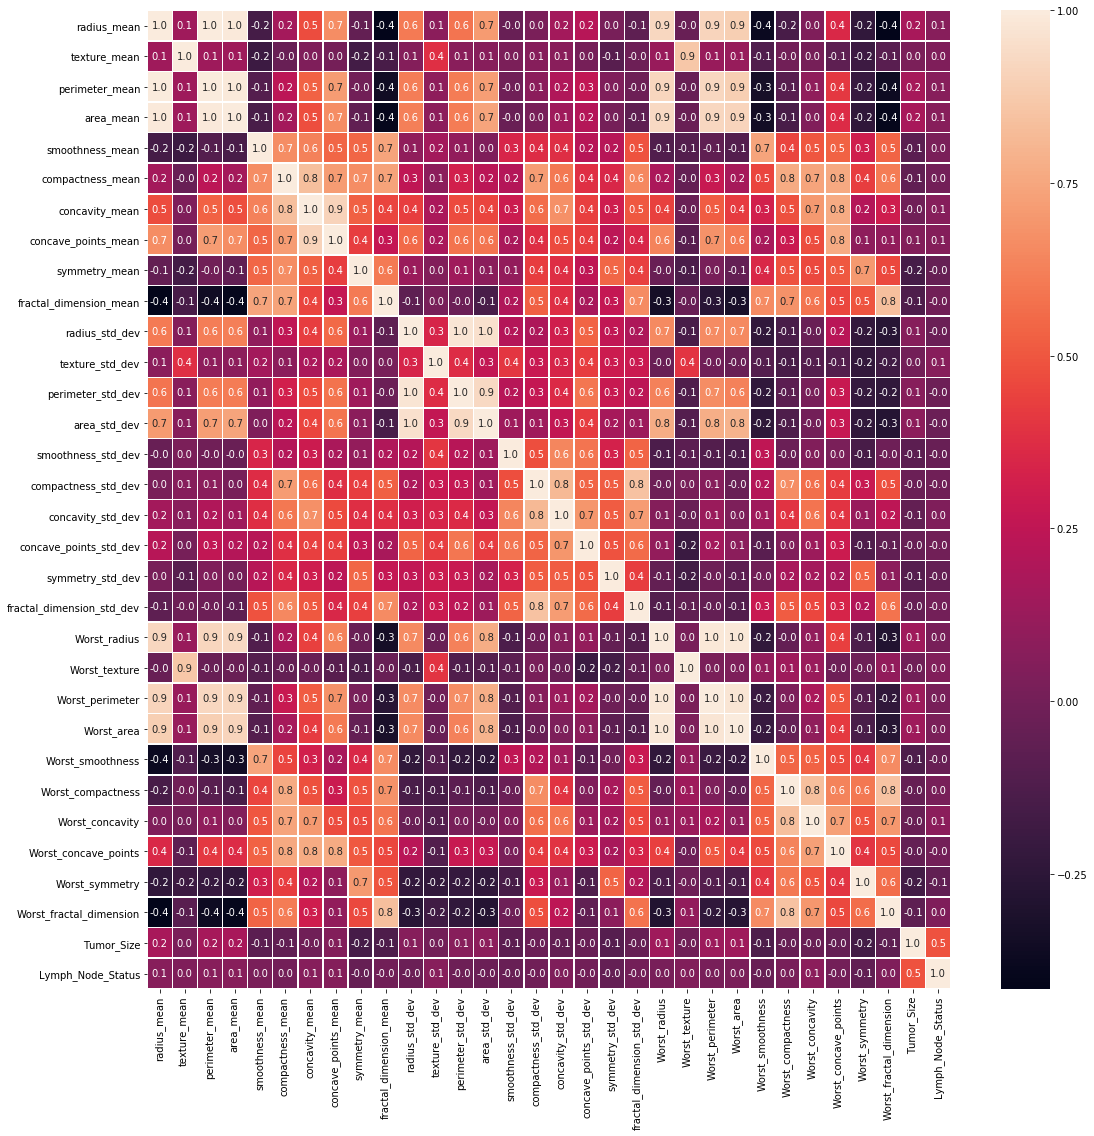

In [ ]:
fi,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5,fmt= '.1f',ax=ax)

In [ ]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave_points_mean','radius_std_dev','perimeter_std_dev','Worst_radius','Worst_perimeter','Worst_compactness','Worst_concave_points','compactness_std_dev','concave_points_std_dev','Worst_texture','Worst_area']
X_1 = X.drop(drop_list1,axis = 1 )         
X_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_std_dev,area_std_dev,smoothness_std_dev,concavity_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_smoothness,Worst_concavity,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,27.60,1013.0,0.09489,0.1086,0.1865,0.06333,1.8900,71.55,0.004433,0.03233,0.01694,0.003495,0.1195,0.3140,0.2677,0.08113,5.0,5.0
1,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890,3.0,2.0
2,17.44,1373.0,0.08836,0.1255,0.2333,0.06010,0.6105,82.15,0.006167,0.03300,0.03094,0.005039,0.1188,0.3414,0.4334,0.09067,2.5,0.0
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300,2.0,0.0
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678,3.5,0.0


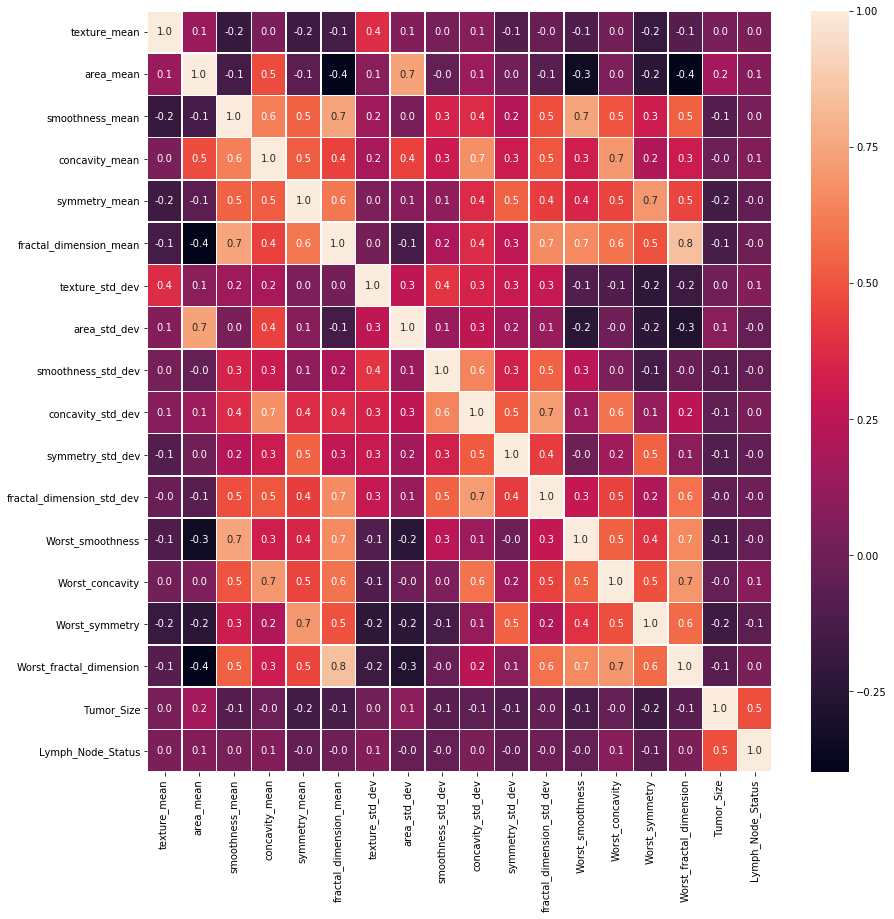

In [ ]:
#after dropping feature which is less important,there is no correlation between features
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
X_1.shape

(198, 18)

<h1>model after feature selction</h1>

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y, test_size = 0.1, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

In [ ]:
classifier1 = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier1.add(Dense(output_dim=9, init='uniform', activation='relu', input_dim=18))
# Adding dropout to prevent overfitting
classifier1.add(Dropout(p=0.1))

In [ ]:
classifier1.add(Dense(output_dim=9, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier1.add(Dropout(p=0.1))

In [ ]:
classifier1.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

In [ ]:
classifier1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
classifier1.fit(X_train1, y_train1, batch_size=100, nb_epoch=150)

Epoch 1/150
178/178 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4101
Epoch 2/150
178/178 [==============================] - 0s 28us/step - loss: 0.6926 - accuracy: 0.7640
Epoch 3/150
178/178 [==============================] - 0s 164us/step - loss: 0.6920 - accuracy: 0.7640
Epoch 4/150
178/178 [==============================] - 0s 39us/step - loss: 0.6914 - accuracy: 0.7640
Epoch 5/150
178/178 [==============================] - 0s 36us/step - loss: 0.6908 - accuracy: 0.7640
Epoch 6/150
178/178 [==============================] - 0s 42us/step - loss: 0.6902 - accuracy: 0.7640
Epoch 7/150
178/178 [==============================] - 0s 34us/step - loss: 0.6897 - accuracy: 0.7640
Epoch 8/150
178/178 [==============================] - 0s 351us/step - loss: 0.6891 - accuracy: 0.7640
Epoch 9/150
178/178 [==============================] - 0s 51us/step - loss: 0.6885 - accuracy: 0.7640
Epoch 10/150
178/178 [==============================] - 0s 44us/step - loss: 0.68

In [ ]:
y_pred1 = classifier1.predict(X_test1)
y_pred1 = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1, y_pred1)
print(cm)
tp1=cm1[0][0]
tn1=cm1[1][1]
fn1=cm1[1][0]
fp1=cm1[0][1]
print("testin score:",(tp1+tn1)/(tp1+tn1+fn1+fp1))

[[14  1]
 [ 5  0]]
testin score: 0.7


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82        15
           1       0.00      0.00      0.00         5

    accuracy                           0.70        20
   macro avg       0.37      0.47      0.41        20
weighted avg       0.55      0.70      0.62        20



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr1,tpr1,t1=roc_curve(y_test1,classifier1.predict_proba(X_test1))

In [ ]:
rc1=roc_auc_score(y_test1,classifier1.predict(X_test1))

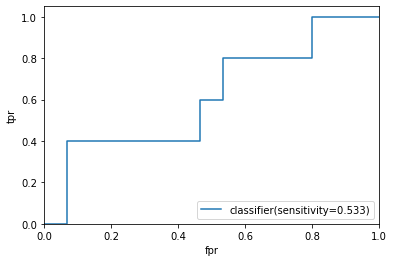

In [ ]:
plt.figure()
plt.plot(fpr,tpr,label='classifier(sensitivity=%0.3f)'%rc1)
#plt.plot(([0,1],[0,1],'r--'))
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc='lower right')
plt.show()

TUNNING

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
def build_ann():
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=32))
    # Adding dropout to prevent overfitting
    classifier.add(Dropout(p=0.1))
    # Adding the input layer and the second hidden layer
    classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
    # Adding dropout to prevent overfitting
    classifier.add(Dropout(p=0.1))
    classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

In [ ]:
classifier=KerasClassifier(build_fn=build_ann, batch_size=10, epochs=10)
accuracies=cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

Epoch 1/10
160/160 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.7750
Epoch 2/10
160/160 [==============================] - 0s 611us/step - loss: 0.6813 - accuracy: 0.7750
Epoch 3/10
160/160 [==============================] - 0s 606us/step - loss: 0.6650 - accuracy: 0.7750
Epoch 4/10
160/160 [==============================] - 0s 671us/step - loss: 0.6367 - accuracy: 0.7750
Epoch 5/10
160/160 [==============================] - 0s 615us/step - loss: 0.5885 - accuracy: 0.7750
Epoch 6/10
160/160 [==============================] - 0s 612us/step - loss: 0.5454 - accuracy: 0.7750
Epoch 7/10
160/160 [==============================] - 0s 604us/step - loss: 0.5136 - accuracy: 0.7750
Epoch 8/10
160/160 [==============================] - 0s 596us/step - loss: 0.4960 - accuracy: 0.7750
Epoch 9/10
160/160 [==============================] - 0s 619us/step - loss: 0.4898 - accuracy: 0.7750
Epoch 10/10
18/18 [==============================] - 0s 3ms/step
Epoch 1/10
160/160 

In [ ]:

print(accuracies)
print()
mean=accuracies.mean()
print(mean)

[0.66666669 0.8888889  0.66666669 0.77777779 0.77777779 0.66666669
 0.94444442 0.55555558 0.88235295 0.82352942]

0.7650326907634735


In [ ]:
#A variance around 0.02 is acceptable
# Our goal is to reduce this variance which is only possible if we tune the ANN
variance=accuracies.std()
print(variance)
#butvarience is larger than 0.02,so have tunned

0.11745125981024263


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def build_ann(optimizer):
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=32))
    # Adding dropout to prevent overfitting
    classifier.add(Dropout(p=0.1))
    # Adding the input layer and the second hidden layer
    classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
    # Adding dropout to prevent overfitting
    classifier.add(Dropout(p=0.1))
    classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

In [ ]:
classifier=KerasClassifier(build_fn=build_ann)
parameters={'batch_size':[25,32],
           'epochs':[100,200],
           'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator= classifier,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=10)
grid_search=grid_search.fit(X_train, y_train)
best_score=grid_search.best_score_
print(best_score)

Epoch 1/100
160/160 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.7688
Epoch 2/100
160/160 [==============================] - 0s 195us/step - loss: 0.6883 - accuracy: 0.7750
Epoch 3/100
160/160 [==============================] - 0s 390us/step - loss: 0.6837 - accuracy: 0.7750
Epoch 4/100
160/160 [==============================] - 0s 104us/step - loss: 0.6762 - accuracy: 0.7750
Epoch 5/100
160/160 [==============================] - 0s 95us/step - loss: 0.6666 - accuracy: 0.7750
Epoch 6/100
160/160 [==============================] - 0s 454us/step - loss: 0.6514 - accuracy: 0.77500s - loss: 0.6529 - accuracy: 0.77
Epoch 7/100
160/160 [==============================] - 0s 242us/step - loss: 0.6282 - accuracy: 0.7750
Epoch 8/100
160/160 [==============================] - 0s 344us/step - loss: 0.6054 - accuracy: 0.7750
Epoch 9/100
160/160 [==============================] - 0s 171us/step - loss: 0.5770 - accuracy: 0.7750
Epoch 10/100
160/160 [====================

In [ ]:
best_parameters=grid_search.best_params_

NameError: name 'grid_search' is not defined

In [ ]:
best_parameters=grid_search.best_score_

In [ ]:
#same way do tunning for ann after feature selection

In [ ]:
#